In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns

In [5]:
df = pd.read_excel("Sales_Forecast_Data.xlsx")

In [8]:
df

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59
...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00


In [9]:
df["FG"].unique()

array(['Insecticides', 'Herbicides', 'Rodenticides', 'Bactericides'],
      dtype=object)

In [10]:
# checking for Null if any

df.isnull().sum()


FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230152 entries, 0 to 230151
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  230152 non-null  object 
 1   MONTH     230152 non-null  object 
 2   STATE     230152 non-null  object 
 3   FG        230152 non-null  object 
 4   DISTRICT  230152 non-null  object 
 5   COMPANY   230152 non-null  object 
 6   VALUE     230152 non-null  float64
dtypes: float64(1), object(6)
memory usage: 12.3+ MB


In [12]:
# Converting Value from float to Integers

df["VALUE"]= df["VALUE"].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230152 entries, 0 to 230151
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FIN_YEAR  230152 non-null  object
 1   MONTH     230152 non-null  object
 2   STATE     230152 non-null  object
 3   FG        230152 non-null  object
 4   DISTRICT  230152 non-null  object
 5   COMPANY   230152 non-null  object
 6   VALUE     230152 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 11.4+ MB


In [14]:
df.shape

(230152, 7)

In [15]:
df.describe()

,VALUE
count,230152.000000
mean,704.827992
std,2261.527262
min,0.000000
25%,0.000000
50%,0.000000
75%,269.000000
max,69828.000000


In [20]:
df.describe(include=object)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY
count,230152,230152,230152,230152,230152,230152
unique,4,12,5,4,142,47
top,2016-2017,Nov,Uttar Pradesh,Herbicides,Karnal,ABC Manufacturing
freq,76280,23864,122644,57538,4308,28640


In [21]:
pd.crosstab(df.STATE, df.VALUE)

VALUE,0,1,2,3,4,5,6,7,8,9,...,51030,52544,54195,54580,55305,55603,56994,59837,60628,69828
STATE,,,,,,,,,,,,,,,,,,,,,
Haryana,35239,82,88,49,60,43,66,55,35,35,...,0,0,0,0,0,0,0,0,0,0
Himachal Pradesh,5701,7,10,1,2,5,5,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Punjab,25746,50,60,23,24,25,29,28,32,23,...,0,1,0,0,0,0,1,0,0,0
Uttar Pradesh,76368,42,58,40,55,45,118,38,51,47,...,1,0,1,1,1,1,0,1,1,1
Uttarakhand,2633,2,19,2,4,28,6,0,24,6,...,0,0,0,0,0,0,0,0,0,0


In [22]:
pd.DataFrame(df.STATE.value_counts())

,STATE
Uttar Pradesh,122644
Haryana,53568
Punjab,41316
Himachal Pradesh,8092
Uttarakhand,4532


In [23]:
pd.DataFrame(df.DISTRICT.value_counts())

,DISTRICT
Karnal,4308
Sirsa,3656
Hisar,3604
Jind,3564
Kurukshetra,3452
...,...
Chamoli,152
Lahul And Spiti,144
Tehri Garhwal,132
Pathankot,44


In [24]:
pd.crosstab(df.COMPANY, df.STATE)

STATE,Haryana,Himachal Pradesh,Punjab,Uttar Pradesh,Uttarakhand
COMPANY,,,,,
ABC Manufacturing,6028,3880,3668,13024,2040
agizu,620,0,612,1468,0
alboid,420,92,0,0,0
ament,212,0,0,0,0
archile,332,0,428,668,0
avape,0,0,44,8,0
biore,464,0,0,0,0
calcise,28,0,0,0,0
canill,200,0,0,0,0


In [25]:
df["VALUE"].max()

69828

In [26]:
df["VALUE"].mean()

704.8279919357642

In [27]:
pd.crosstab(df.FIN_YEAR, df.STATE)

STATE,Haryana,Himachal Pradesh,Punjab,Uttar Pradesh,Uttarakhand
FIN_YEAR,,,,,
2014-2015,8796,932,10272,31084,1164
2015-2016,9572,1156,10568,31092,1176
2016-2017,27332,5064,10328,32348,1208
2017-2018,7868,940,10148,28120,984


In [28]:
df1 = df.groupby("STATE")["VALUE"].sum() 

In [31]:
State_Wise

,FIN_YEAR,STATE,VALUE
0,2014-2015,Haryana,675
1,2014-2015,Haryana,73
2,2014-2015,Haryana,405
3,2014-2015,Haryana,1188
4,2014-2015,Haryana,5188
...,...,...,...
230147,2016-2017,Uttar Pradesh,0
230148,2016-2017,Uttar Pradesh,6
230149,2016-2017,Uttar Pradesh,0
230150,2016-2017,Uttar Pradesh,486


In [29]:
df1

STATE
Haryana             28017782
Himachal Pradesh     1113043
Punjab              38625540
Uttar Pradesh       90309909
Uttarakhand          4151298
Name: VALUE, dtype: int32

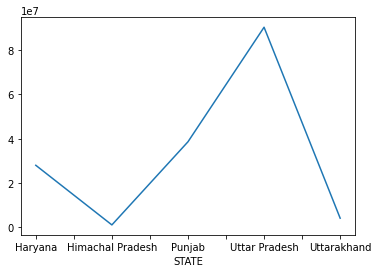

In [30]:
df1.plot()
plt.show()


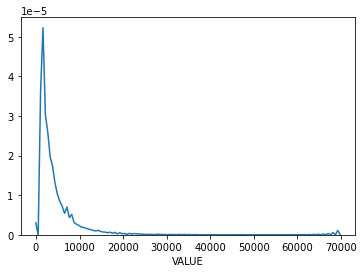

In [31]:
sns.distplot(df['VALUE'], hist=False)

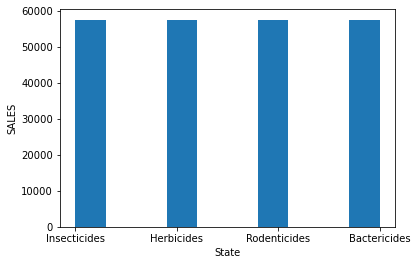

In [32]:
plt.hist(df["FG"],bins=10,)
plt.ylabel("SALES")
plt.xlabel("State")
plt.show()

In [33]:
State_Wise=pd.DataFrame(data=df,columns=["FIN_YEAR","STATE","VALUE"])

In [35]:
State_Wise

,FIN_YEAR,STATE,VALUE
0,2014-2015,Haryana,675
1,2014-2015,Haryana,73
2,2014-2015,Haryana,405
3,2014-2015,Haryana,1188
4,2014-2015,Haryana,5188
...,...,...,...
230147,2016-2017,Uttar Pradesh,0
230148,2016-2017,Uttar Pradesh,6
230149,2016-2017,Uttar Pradesh,0
230150,2016-2017,Uttar Pradesh,486


In [36]:
State_Wise.drop(["FIN_YEAR"], axis = 1, inplace = True)

In [37]:
State_Wise.set_index("STATE", inplace = True)

In [ ]:
plt.hist(State_Wise,bins=10,)
plt.ylabel("SALES")
plt.xlabel("State")
plt.show()

In [ ]:
State_Wise.plot()
plt.legend("State Wise Sales")
plt.xlim(10000,100000)
plt.show()

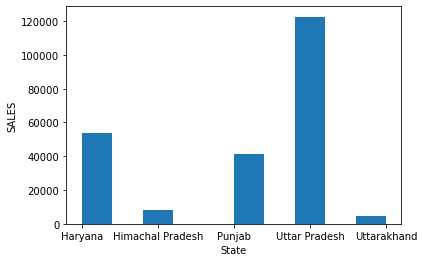

In [38]:
plt.hist(df["STATE"],bins=10,)
plt.ylabel("SALES")
plt.xlabel("State")
plt.show()

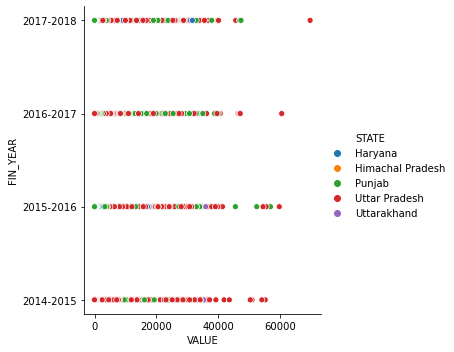

In [39]:
sns.relplot(x='VALUE',y='FIN_YEAR',hue ='STATE',data=df)

In [92]:
# SECOND PART OF THE PROJECT

In [40]:
df2 = df.groupby("FG")["VALUE"].sum().sort_values()

In [43]:
df2

FG
Bactericides      4058696
Herbicides        7342055
Rodenticides     34268852
Insecticides    116547969
Name: VALUE, dtype: int32

In [44]:
df2.describe()

count    4.000000e+00
mean     4.055439e+07
std      5.243894e+07
min      4.058696e+06
25%      6.521215e+06
50%      2.080545e+07
75%      5.483863e+07
max      1.165480e+08
Name: VALUE, dtype: float64

In [45]:
df2.shape

(4,)

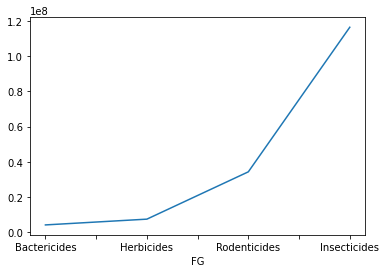

In [46]:
df2.plot()
plt.show()

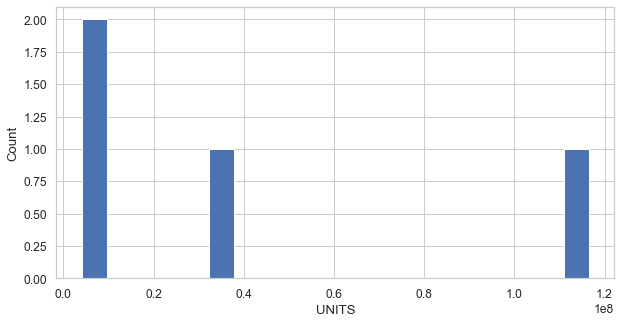

In [47]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(
    df2, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='UNITS', ylabel='Count');

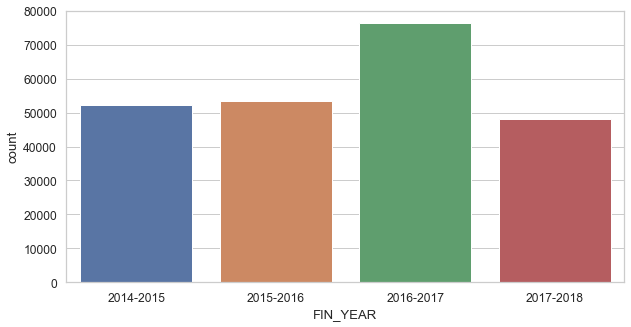

In [48]:
sns.countplot(df['FIN_YEAR']);

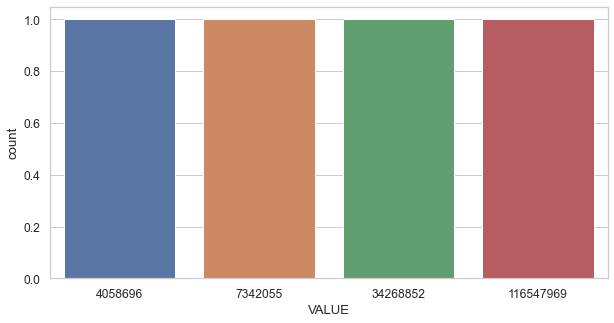

In [49]:
sns.countplot(df2);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EED7183970>]],
      dtype=object)

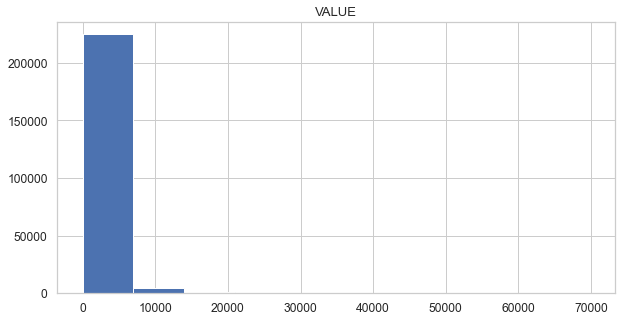

In [50]:
Fertilizers_Num = df.select_dtypes(include = ["int"])
Fertilizers_Num.hist(bins = 10)

In [51]:
pd.crosstab(df.FG,df.VALUE,margins=True)

VALUE,0,1,2,3,4,5,6,7,8,9,...,52544,54195,54580,55305,55603,56994,59837,60628,69828,All
FG,,,,,,,,,,,,,,,,,,,,,
Bactericides,48642,5,14,7,12,10,71,4,12,13,...,0,0,0,0,0,0,0,0,0,57538
Herbicides,48570,88,94,54,60,56,71,58,52,44,...,0,0,0,0,0,0,0,0,0,57538
Insecticides,15933,20,23,13,25,12,22,17,19,13,...,1,1,1,1,1,1,1,1,1,57538
Rodenticides,32542,70,104,41,48,68,60,44,60,41,...,0,0,0,0,0,0,0,0,0,57538
All,145687,183,235,115,145,146,224,123,143,111,...,1,1,1,1,1,1,1,1,1,230152


In [52]:
df3=pd.DataFrame(data=df,columns=["FIN_YEAR","FG","VALUE"])

In [53]:
df3

,FIN_YEAR,FG,VALUE
0,2014-2015,Insecticides,675
1,2014-2015,Insecticides,73
2,2014-2015,Insecticides,405
3,2014-2015,Insecticides,1188
4,2014-2015,Insecticides,5188
...,...,...,...
230147,2016-2017,Bactericides,0
230148,2016-2017,Bactericides,6
230149,2016-2017,Bactericides,0
230150,2016-2017,Bactericides,486


In [172]:
df3.set_index("FIN_YEAR", inplace = True)

In [173]:
df3

,FG,VALUE
FIN_YEAR,,
2014-2015,Insecticides,675
2014-2015,Insecticides,73
2014-2015,Insecticides,405
2014-2015,Insecticides,1188
2014-2015,Insecticides,5188
...,...,...
2016-2017,Bactericides,0
2016-2017,Bactericides,6
2016-2017,Bactericides,0


In [174]:
df3.describe(include=object)

,FG
count,230152
unique,4
top,Herbicides
freq,57538


In [175]:
df3.index

Index(['2014-2015', '2014-2015', '2014-2015', '2014-2015', '2014-2015',
       '2014-2015', '2014-2015', '2014-2015', '2014-2015', '2014-2015',
       ...
       '2016-2017', '2016-2017', '2016-2017', '2016-2017', '2016-2017',
       '2016-2017', '2016-2017', '2016-2017', '2016-2017', '2016-2017'],
      dtype='object', name='FIN_YEAR', length=230152)

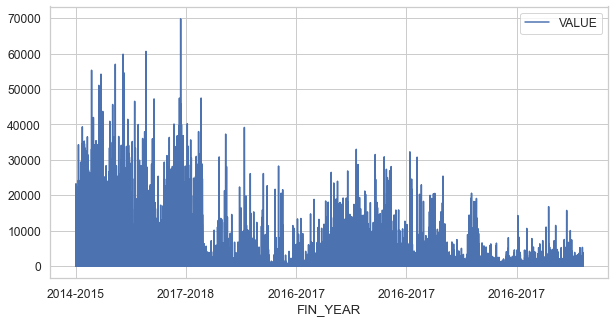

In [177]:
df3.plot()
plt.show()

In [188]:
df4=pd.DataFrame(data=df,columns=["FIN_YEAR","FG","VALUE"])

In [185]:
df4

,FIN_YEAR,FG,VALUE
0,2014-2015,Insecticides,675
1,2014-2015,Insecticides,73
2,2014-2015,Insecticides,405
3,2014-2015,Insecticides,1188
4,2014-2015,Insecticides,5188
...,...,...,...
230147,2016-2017,Bactericides,0
230148,2016-2017,Bactericides,6
230149,2016-2017,Bactericides,0
230150,2016-2017,Bactericides,486


In [189]:
df4.drop(["FIN_YEAR"], axis = 1, inplace = True)

In [190]:
df4

,FG,VALUE
0,Insecticides,675
1,Insecticides,73
2,Insecticides,405
3,Insecticides,1188
4,Insecticides,5188
...,...,...
230147,Bactericides,0
230148,Bactericides,6
230149,Bactericides,0
230150,Bactericides,486


In [192]:
df4.set_index("FG", inplace = True)

In [193]:
df4

,VALUE
FG,
Insecticides,675
Insecticides,73
Insecticides,405
Insecticides,1188
Insecticides,5188
...,...
Bactericides,0
Bactericides,6
Bactericides,0


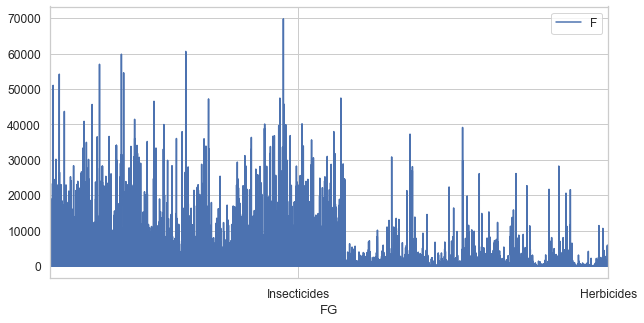

In [203]:
df4.plot()
plt.legend("FertilizerSales")
plt.xlim(10000,100000)
plt.show()